# Limpiando MetroNetwork 

In [1]:
include("graphs_metro.txt");

### `lineas_metro.txt`

Contiene las *variables*: <br>
**`LineaN:`** N-ésima línea con el nombre de las estaciónes. <br>
**`Express_LíneaN:`** N-ésima línea Express (línea de sólo transbordos)<br>
**`Todas_Lineas:`** Arreglo donde cada entrada es una línea entera; así `Todas_Lineas[i][j]` nos dará la estación `j` de la línea `i`. <br>
**`transfer_list:`** Arreglo de todos los transbordos de `Todas_Líneas`. <br>
**`transfer_listplus:`** Arreglo de todos los transbordos de `Todas_LíneasPlus`.

y las  *funciones*: <br>
**`Length_Lineas(total_lines):`** Número de estaciones de cada línea, en orden de línea. <br>
**`Length_Estaciones(total_lines):`** Número total de estaciones en toda la red <br>
**`GetStationNumber(station_name, line_number, total_lines) :`** Se da el nombre de una estación y la línea en donde se encuentra, y regresa el número de estación que le corresponde de la red. <br>
**`GetStationName(station_number, total_lines) :`** Dado el número de estación en la red, te regresa el nombre de estación que le corresponde. <br>
**`Transfer_List(total_lines):`** Dada una *red* de Metro, nos regresa una lista con todos los números de tranbordo.

**Obs:** El default es siempre `Todas_Lineas`.

### `graphs_metro.txt`

Contiene las *variables*: <br>
**`D_norm:`** Matriz con todas las distancias mínimas entre estaciones de `Todas_Lineas`.<br>
**`D_plus:`** Matriz con todas las distancias mínimas entre estaciones de `Todas_LineasPlus`.

y las *funciones*: <br>
**`MetroNetwork(total_lines):`** Hace una red tipo `Graph` con el número de estaciones totales en el arreglo de líneas. <br>
**`ConnectSimpleNetwork(total_lines):`** Une las estaciones de cada línea con aristas, sin considerar transbordos.
**`ConnectLines(total_lines):`** Une con aristas los transbordos de la red. <br>
**`ConnectFullNetwork_Weighted(normal_edge, transit_edge,total_lines):`** Crea la *red* de todas las líneas, dándole un peso `normal_edge`entre estaciones y `transit_edge` entre transbordos. <br>
**`NormalesyTrasbordos(matrix_dist, est_init, est_final,transit_edge_dist, normal_edge_dist):`** : Regresa una tupla con el número de estaciones recorridas y el número de transbordos efectuados. <br>
**`NormalesTrasbordosyExpress(matrix_dist, est_init, est_final,transit_edge_dist, normal_edge_dist, express_edge_dist):`** Nos da una tupla con número de estaciones, número de transbordos y número de estaciones express recorridas. <br>
**`MatrixDist(transfer_list, total_lines):`** Crea una matriz `D` con las **distancias mínimas** entre estaciones.<br> *Ej: `D[i,j]` = distancia mínima entre i-ésima y j-ésima estación.* 

**Obs_1:** Falta incluir el "peso" de cada arista, dependiendo de su tipo. <br>
**Obs_2:** El default es siempre `Todas_Lineas`.

<img src="Mexico_City_metro.png"> 

 que obtengamos el número de estaciones normales recorridas y los trasbordos. Lo que queremos es lo siguiente: <br>
* Tomamos aletoriamente dos estaciones $inicio = rand(0, N)$ $ fin = rand(0, N)$, pedimos $inicio != fin$ con un if.
* Calculamos el número de estaciones normale y el número de trasbordos y después hacemos lo siguiente
* Cuando un pasajero se sube al metro espera un tiempo $t_{espera}$ a que pase el metro, suponemos que máximo el metro tarda en pasar $t_{max}$ (ej. a lo más tarda 15 minutos, entonces $t_{max} = 15\times60 s$). Suponemos que la distribución es uniforme (aunque después sería bueno asumir distribución gaussiana o poisson... pero después vemos eso).
Entonces $t_{espera} = rand()*t_{max}$. <br>
* Cuando el metro se detiene en una estación se detiene a lo menos $t_{parada_min}$ y a lo más $t_{parada_max}$. Entonces por cada estación que pare el metro se debe de tomar en cuenta $t_{parada} = rand(t_{parada_min}, t_{parada_max})$ (o como sea que se ponga en la función) <br>
* Cuando el pasajero hace un trasbordo entonces tarda en caminar un tiempo $t_{trasbordo}$ y además debe de esperar a que vuelva a pasar el camión. Volvemos a calcular un $t_{espera} = rand()*t_{max}$.
* Finalmente sumamos todo el tiempo y vemos total de estaciones que recorrio y lo guardamos en una lista apropiada. Después vamos con el siguiente pasajero y hacemos lo mismo.

In [2]:
using PyPlot
using Distributions

INFO: Loading help data...


In [3]:
#Peso de las aristas
normal_edge_dist=1
transit_edge_dist=1.1

#Constantes de tiempos
tprom_espera = 4*60.
t_viaje = normal_edge_dist*60 #- tprom_parada 
tprom_parada = 15.
t_tras = 2*60.

120.0

In [4]:
#Simula N pasajeros de estaciones iniciales y finales aleatorias.
#Regresa Estaciones viajadas, Tiempo transcurrido, Velocidad media
function PasajerosGaussiana(DistMatrix, tprom_espera, t_viaje, tprom_parada, t_tras, N_pasajeros, transit_edge_dist, normal_edge_dist)
    N_est = length(DistMatrix[1, :])
    Stations_traveled = zeros(N_pasajeros)
    Time_traveled = zeros(N_pasajeros)
    Velocidad = zeros(N_pasajeros)
    for pasajero = 1:N_pasajeros
        initial_station = rand(1:N_est)
        end_station = rand(1:N_est)
        while GetStationName(initial_station) == GetStationName(end_station)
            initial_station = rand(1:N_est)
            end_station = rand(1:N_est) 
        end
        num_est, num_tras = NormalesyTrasbordos(DistMatrix, initial_station, end_station, transit_edge_dist, normal_edge_dist)
        Stations_traveled[pasajero] = num_est
        tiempo_tras = 0
        for tras = 1:num_tras
            tiempo_tras += tprom_espera*rand() + t_tras
        end
        tiempo_paradas = 0
        for parada = 1:num_est
            tiempo_paradas += tprom_parada*rand() + t_viaje
        end
        tiempito = tprom_espera*rand() + tiempo_tras + tiempo_paradas
        Time_traveled[pasajero] = tiempito
        Velocidad[pasajero] = num_est/tiempito
        
    end
    return Stations_traveled, Time_traveled, Velocidad
end

PasajerosGaussiana (generic function with 1 method)

In [5]:
ESTg,TIMEg,VELg = PasajerosGaussiana(D_norm, tprom_espera, t_viaje, tprom_parada, t_tras, 100_000, transit_edge_dist, normal_edge_dist);

LoadError: NormalesyTrasbordos not defined
while loading In[5], in expression starting on line 1

In [6]:
plt.hist(VELg,bins=100,normed=true)

LoadError: VELg not defined
while loading In[6], in expression starting on line 1

In [7]:
function PasajerosPoisson(DistMatrix, tprom_espera, t_viaje, tprom_parada, t_tras, N_pasajeros, transit_edge_dist, normal_edge_dist)
    N_est = length(DistMatrix[1, :])
    Stations_traveled = zeros(N_pasajeros)
    Time_traveled = zeros(N_pasajeros)
    Velocidad = zeros(N_pasajeros)
    for pasajero = 1:N_pasajeros
        initial_station = rand(1:N_est)
        end_station = rand(1:N_est)
        while GetStationName(initial_station) == GetStationName(end_station)
            initial_station = rand(1:N_est)
            end_station = rand(1:N_est) 
        end
        num_est, num_tras = NormalesyTrasbordos(DistMatrix, initial_station, end_station, transit_edge_dist, normal_edge_dist)
        Stations_traveled[pasajero] = num_est
        tiempo_tras = 0
        for tras = 1:num_tras
            tiempo_tras += tprom_espera*rand(Distributions.Poisson()) + t_tras
        end
        tiempo_paradas = 0
        for parada = 1:num_est
            tiempo_paradas += tprom_parada*rand(Distributions.Poisson()) + t_viaje
        end
        tiempito = tprom_espera*rand(Distributions.Poisson()) + tiempo_tras + tiempo_paradas
        Time_traveled[pasajero] = tiempito
        Velocidad[pasajero] = num_est/tiempito
        
    end
    return Stations_traveled, Time_traveled, Velocidad
end

PasajerosPoisson (generic function with 1 method)

In [8]:
ESTp,TIMEp,VELp = PasajerosPoisson(D_norm, tprom_espera, t_viaje, tprom_parada, t_tras, 100_000, transit_edge_dist, normal_edge_dist);

LoadError: NormalesyTrasbordos not defined
while loading In[8], in expression starting on line 1

In [9]:
plt.hist(VELp,bins=100,normed=true);

LoadError: VELp not defined
while loading In[9], in expression starting on line 1

## MonteCarlo

Se simulan $N$ caminantes con estaciones iniciales y finales aleatorias (uniformemente distribuidas).
Se le dará también una distribución de `Rayleigh` a cada tiempo de espera.
Es decir, una distribución para tiempo de espera entre cada parada, para tiempo de espera entre trasbordos.

Se escoje la distribución de `Rayleigh` porque es lo más cercano a la realidad en los tiempos de espera del metro del DF; es decir, no se distribuye el tiempo uniformemente alrededor de la media.

In [10]:
# LogNormal
# Pareto(a,b)
# Rayleigh() <- ¡es la mejor!
# Weibull(2,1)
a = zeros(10000)
for i in 1:10000
    a[i] = rand(Rayleigh())
end
maximum(a),minimum(a),mean(a),std(a)

(4.462287981937607,0.012435987997060069,1.247854082903053,0.648884227360248)

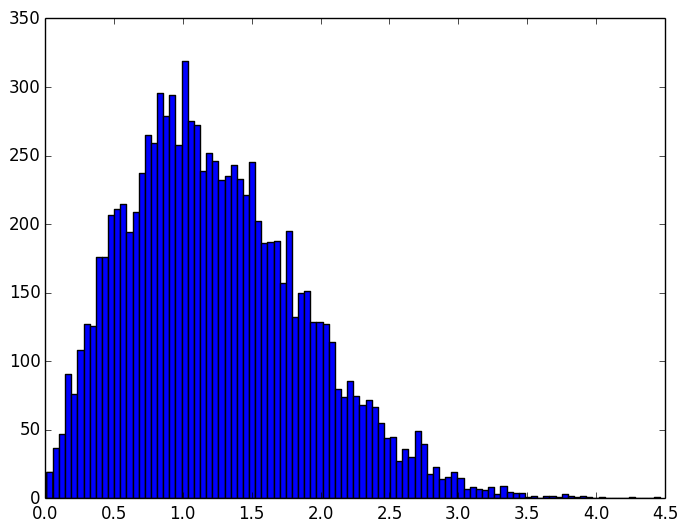

In [11]:
plt.hist(a,bins=100);

In [12]:
tprom_espera = 4*60. #En promedio esperas 4 min a que pase el metro
t_viaje = 1*60 #El metro tarda 1 minuto en pasar de una estación a otra
tprom_parada = 20. #El metro se para 20 segundos en promedio en cada estación
t_tras = 1*60. #Tardas 1 minuto en hacer el trasbordo (parte a pie)
normal_edge = t_viaje + tprom_parada
transit_edge = t_tras + tprom_espera + 0.1 #los puntos flotantes nos van a ayudar a distinguir
express_edge = 2*t_viaje + tprom_parada + 0.001

140.001

In [13]:
length(D_plus[1,:])

259

In [14]:
function Pasajeros_Rayleigh(N_pasajeros, total_lines=Todas_LineasPlus, D_normal=D_norm, D_express=D_plus, tprom_espera=tprom_espera, t_viaje=t_viaje, tprom_parada=tprom_parada, t_tras=t_tras)
    
    normal_edge  = t_viaje + tprom_parada
    transit_edge = t_tras + tprom_espera + 0.1  
    express_edge = 2*t_viaje + tprom_parada + 0.001
    
    N_est = length(D_express[1,:])
    Stations_traveled  = zeros(N_pasajeros) #Esta es la misma para ambas
    Time_traveled_norm = zeros(N_pasajeros)
    Time_traveled_exp = zeros(N_pasajeros)
    Velocidad_norm = zeros(N_pasajeros)
    Velocidad_exp = zeros(N_pasajeros)
    
    M = Length_Lineas(total_lines)
    
    for pasajero = 1:N_pasajeros
        initial_station = rand(1:N_est)
        end_station = rand(1:N_est)
        while GetStationName(initial_station,total_lines,M) == GetStationName(end_station,total_lines,M)
            initial_station = rand(1:N_est)
            end_station = rand(1:N_est) 
        end
        
        num_est, num_tras_norm, num_exp, num_tras_exp = NormalesTrasbordosyExpress(initial_station, end_station, D_normal, D_express)
        
        #Parte del Metro normal
        tiempo_tras_norm = 0
        for tras = 1:num_tras_norm
            tiempo_tras_norm += tprom_espera*rand(Rayleigh()) + t_tras
        end
        tiempo_paradas_norm = 0
        for parada = 1:num_est
            tiempo_paradas_norm += tprom_parada*rand(Rayleigh()) + t_viaje
        end
        tiempito_norm = tprom_espera*rand(Rayleigh()) + tiempo_tras_norm + tiempo_paradas_norm
        Time_traveled_norm[pasajero] = tiempito_norm
        Velocidad_norm[pasajero] = num_est/tiempito_norm
        
        #Parte del Metro Express
        tiempo_tras_exp = 0
        for tras = 1:num_tras_exp
            tiempo_tras_exp += tprom_espera*rand(Rayleigh()) + t_tras
        end
        tiempo_paradas_exp = 0
        for parada = 1:num_exp
            tiempo_paradas_exp += tprom_parada*rand(Rayleigh()) + 2*t_viaje #Pues el express tarda el doble en un viaje
        end
        tiempito_exp = tprom_espera*rand(Rayleigh()) + tiempo_tras_exp + tiempo_paradas_exp
        Time_traveled_norm[pasajero] = tiempito_exp
        Velocidad_norm[pasajero] = num_est/tiempito_exp
        
    end
    return Stations_traveled, Time_traveled_norm, Velocidad_norm, Time_traveled_exp, Velocidad_exp
end

Pasajeros_Rayleigh (generic function with 8 methods)

In [20]:
@time PASSENGER = Pasajeros_Rayleigh(1_000_000)

elapsed time: 16.80431007 seconds (3596666136 bytes allocated, 22.67% gc time)


([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[2299.93,2394.81,1181.93,599.164,3378.03,2008.14,1761.26,1633.65,1316.43,1301.25  …  1682.32,1140.87,863.608,1839.74,2036.41,1285.7,764.049,791.563,1987.83,2285.83],[0.0100003,0.00876895,0.00592253,0.00166899,0.00592061,0.00298784,0.00397443,0.0067334,0.00911557,0.0146014  …  0.0106995,0.00438263,0.0069476,0.00924041,0.00343743,0.00311113,0.00392645,0.0050533,0.00704286,0.00481226],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])